In [2]:
import opendatasets as od
import os


dataset_url = 'https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset'

download_path = './rice_dataset'

if not os.path.exists(download_path):
    print("Downloading dataset (you will be prompted for Kaggle credentials)...")
    od.download(dataset_url, data_dir=download_path)
    print("Download complete.")
else:
    print(f"Dataset directory '{download_path}' already exists. Skipping download.")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Krithanaa
Your Kaggle Key: ········
Dataset URL: https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset
Download complete.


In [9]:
import pathlib
download_path=r"C:\Users\batch1\Downloads\ricedatset"
data_dir_root = pathlib.Path(download_path) / 'Rice_Image_Dataset'

if data_dir_root.exists():
    print(f"Successfully located data root directory: {data_dir_root}")
    # List the subdirectories (which are your class names)
    class_names = sorted([item.name for item in data_dir_root.glob('*') if item.is_dir()])
    print(f"Found {len(class_names)} classes: {class_names}")
else:
    print(f"Error: Directory not found at {data_dir_root}")



Successfully located data root directory: C:\Users\batch1\Downloads\ricedatset\Rice_Image_Dataset
Found 5 classes: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


In [10]:
import tensorflow as tf

# Configuration parameters
IMAGE_SIZE = (224, 224) # Common size for CNN models
BATCH_SIZE = 32

# Load the training dataset using the confirmed path from Step 3
# We can also use validation_split here to create a separate validation set
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_root,
    labels='inferred',
    label_mode='categorical',
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    validation_split=0.2, # Use 20% of data for validation
    subset='training',
    seed=123 # Seed for reproducible splits
)

# Load the validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_root,
    labels='inferred',
    label_mode='categorical',
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False, # Often keep validation unshuffled
    validation_split=0.2,
    subset='validation',
    seed=123
)

print(f"\nTraining dataset created with {tf.data.experimental.cardinality(train_ds).numpy() * BATCH_SIZE} images (approx).")
print(f"Validation dataset created with {tf.data.experimental.cardinality(val_ds).numpy() * BATCH_SIZE} images (approx).")
print(f"Class names: {train_ds.class_names}")



Found 75000 files belonging to 5 classes.
Using 60000 files for training.
Found 75000 files belonging to 5 classes.
Using 15000 files for validation.

Training dataset created with 60000 images (approx).
Validation dataset created with 15008 images (approx).
Class names: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


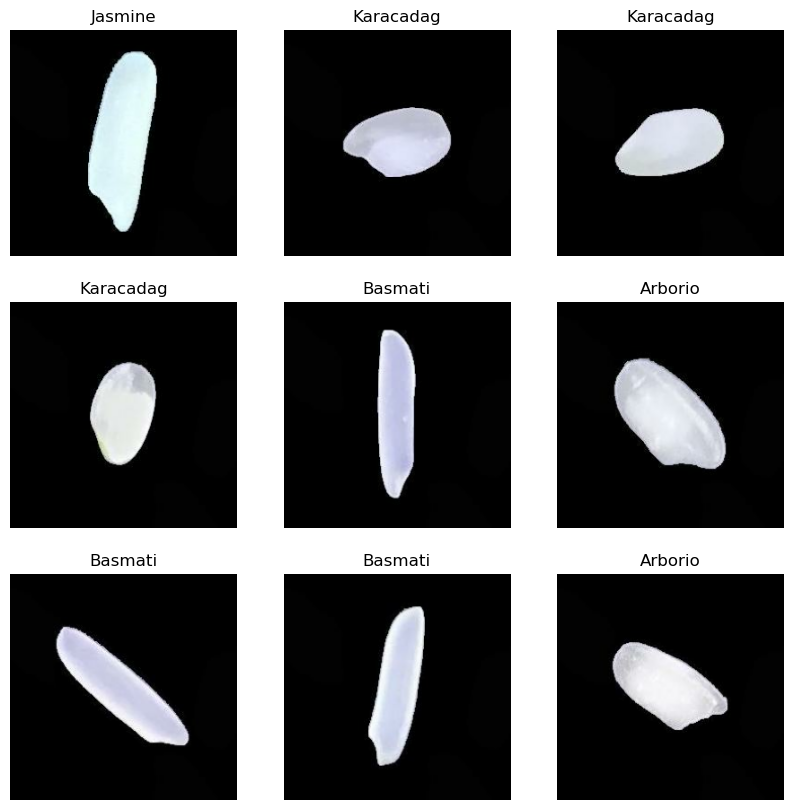

In [11]:
import matplotlib.pyplot as plt

# Get one batch of images and labels from the training set
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        # Get the class name from the one-hot encoded label
        class_index = tf.argmax(labels[i]).numpy()
        plt.title(train_ds.class_names[class_index])
        plt.axis("off")
    plt.show()
    break


In [ ]:
from tensorflow.keras import layers, models

num_classes = len(train_ds.class_names)

model = models.Sequential([
    # Rescale pixel values from [0, 255] to [0, 1]
    layers.Rescaling(1./255, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),

    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax') # Softmax for multi-class classification
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Train the model for a few epochs
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)


C:\Users\batch1\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,908,037 (91.20 MB)

 Trainable params: 23,908,037 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
 684/1875 ━━━━━━━━━━━━━━━━━━━━ 5:53 297ms/step - accuracy: 0.8811 - loss: 0.4136